# Defensive Player of the Year (DPOY) Award Shares Prediction Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
award_df = pd.read_csv('base.csv')
award_df

,seas_id,season,player_id,player,age,experience,g,gs,mp,fg,...,dpoy,mip,nba mvp,nba roy,smoy,pos_C,pos_PF,pos_PG,pos_SF,pos_SG
0,31136,2024,5025,A.J. Green,24.0,2,56,0.0,614.0,83,...,0.0,0.0,0.0,0.0,0.0,False,False,False,False,True
1,31137,2024,5026,A.J. Lawson,23.0,2,42,0.0,311.0,54,...,0.0,0.0,0.0,0.0,0.0,False,False,False,False,True
2,31138,2024,5027,AJ Griffin,20.0,2,20,0.0,171.0,18,...,0.0,0.0,0.0,0.0,0.0,False,False,False,True,False
3,31139,2024,4219,Aaron Gordon,28.0,10,73,73.0,2297.0,398,...,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False
4,31140,2024,4582,Aaron Holiday,27.0,6,78,1.0,1269.0,186,...,0.0,0.0,0.0,0.0,0.0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10340,19312,2004,3295,Zendon Hamilton,28.0,4,46,0.0,473.0,51,...,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False
10341,19313,2004,3495,Zoran Planinić,21.0,1,49,1.0,473.0,53,...,0.0,0.0,0.0,0.0,0.0,False,False,False,False,True
10342,19314,2004,3100,Zydrunas Ilgauskas,28.0,6,81,81.0,2539.0,466,...,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False
10343,19307,2004,3493,Žarko Čabarkapa,22.0,1,49,4.0,570.0,81,...,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False


In [3]:
award_df.columns

Index(['seas_id', 'season', 'player_id', 'player', 'age', 'experience', 'g',
       'gs', 'mp', 'fg', 'fga', 'fg_percent', 'x3p', 'x3pa', 'x3p_percent',
       'x2p', 'x2pa', 'x2p_percent', 'e_fg_percent', 'ft', 'fta', 'ft_percent',
       'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'dpoy',
       'mip', 'nba mvp', 'nba roy', 'smoy', 'pos_C', 'pos_PF', 'pos_PG',
       'pos_SF', 'pos_SG'],
      dtype='object')

### Setting up Dataset for DPOY Prediction Task

In [4]:
cols_to_drop = ['seas_id', 'season', 'player_id', 'player', 'dpoy', 'mip', 'nba mvp', 'nba roy', 'smoy']
X = award_df.drop(cols_to_drop, axis=1)
y = award_df['dpoy']

### Train-Test Split of Dataset
- **test_size=0.2** &rarr; Use 20% of Dataset for Testing
- **random_state=482** &rarr; Reproducibility of Results

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=482)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8276, 32), (2069, 32), (8276,), (2069,))

### Linear Regression

In [6]:
reg_linear = LinearRegression()

reg_linear.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred_linear = reg_linear.predict(X_test)
y_pred_linear = np.where(y_pred_linear < 0.0, 0, y_pred_linear) # Replace values less than 0 with 0, otherwise keep the original value
mse_linear = mean_squared_error(y_pred_linear, y_test)

print(f"When using a Linear Regression Model, the MSE for DPOY Award Shares is {np.round(mse_linear, 4)*100}%")

When using a Linear Regression Model, the MSE for DPOY Award Shares is 0.16999999999999998%


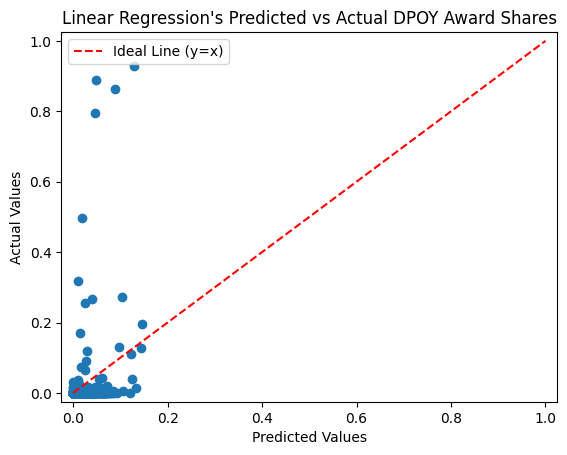

In [8]:
plt.scatter(y_pred_linear, y_test)
plt.plot([0, 1], [0, 1], color='r', linestyle="--", label="Ideal Line (y=x)")
plt.xlim([-0.025, 1.025])
plt.ylim([-0.025, 1.025])
plt.title("Linear Regression's Predicted vs Actual DPOY Award Shares")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.legend()
plt.show()

### Decision Tree Regressor

In [9]:
reg_tree = DecisionTreeRegressor()

reg_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [10]:
y_pred_tree = reg_tree.predict(X_test)
y_pred_tree = np.where(y_pred_tree < 0.0, 0, y_pred_tree) # Replace values less than 0 with 0, otherwise keep the original value
mse_tree = mean_squared_error(y_pred_tree, y_test)

print(f"When using a Decision Tree Regressor Model, the MSE for DPOY Award Shares is {np.round(mse_tree, 4)*100}%")

When using a Decision Tree Regressor Model, the MSE for DPOY Award Shares is 0.24%


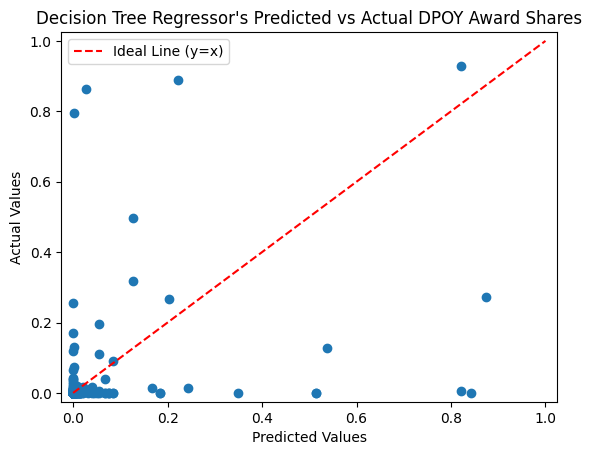

In [11]:
plt.scatter(y_pred_tree, y_test)
plt.plot([0, 1], [0, 1], color='r', linestyle="--", label="Ideal Line (y=x)")
plt.xlim([-0.025, 1.025])
plt.ylim([-0.025, 1.025])
plt.title("Decision Tree Regressor's Predicted vs Actual DPOY Award Shares")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.legend()
plt.show()